In [91]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [92]:
text = """  
Although some scientists equate the term humans with all members of the genus Homo. Modern humans emerged around 300,000 years ago"""

In [93]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
token = [token.text for token in doc]

In [94]:
stopwords = list(STOP_WORDS)

In [95]:
punctuation = punctuation +'\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [96]:
word_frequency = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequency.keys():
                word_frequency[word.text]=1
            else:
                word_frequency[word.text]+=1
max(word_frequency)

'years'

In [97]:
max_word_frequency = max(word_frequency.values())
max_word_frequency
   

2

In [98]:
import pandas as pd
df = pd.DataFrame(word_frequency.items(), columns=['word','freq'])
#df = pd.DataFrame(word_frequency)
df.head(50)

,word,freq
0,\n,1
1,scientists,1
2,equate,1
3,term,1
4,humans,2
5,members,1
6,genus,1
7,Homo,1
8,Modern,1
9,emerged,1


In [99]:
sorted_df = df.sort_values('freq', ascending=False)

In [100]:
sorted_df

,word,freq
4,humans,2
0,\n,1
1,scientists,1
2,equate,1
3,term,1
5,members,1
6,genus,1
7,Homo,1
8,Modern,1
9,emerged,1


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

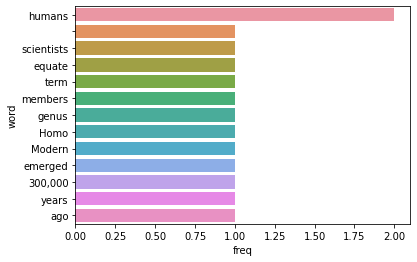

In [102]:
sns.barplot(x=sorted_df.freq,y=sorted_df.word)
plt.show()

In [103]:
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
from collections import Counter
from nltk.util import ngrams 

n_gram = 2
bigrams = Counter(ngrams(token, n_gram))

In [105]:
bigrams.most_common()

[(('  \n', 'Although'), 1),
 (('Although', 'some'), 1),
 (('some', 'scientists'), 1),
 (('scientists', 'equate'), 1),
 (('equate', 'the'), 1),
 (('the', 'term'), 1),
 (('term', 'humans'), 1),
 (('humans', 'with'), 1),
 (('with', 'all'), 1),
 (('all', 'members'), 1),
 (('members', 'of'), 1),
 (('of', 'the'), 1),
 (('the', 'genus'), 1),
 (('genus', 'Homo'), 1),
 (('Homo', '.'), 1),
 (('.', 'Modern'), 1),
 (('Modern', 'humans'), 1),
 (('humans', 'emerged'), 1),
 (('emerged', 'around'), 1),
 (('around', '300,000'), 1),
 (('300,000', 'years'), 1),
 (('years', 'ago'), 1)]

In [106]:
bigrams.most_common()

[(('  \n', 'Although'), 1),
 (('Although', 'some'), 1),
 (('some', 'scientists'), 1),
 (('scientists', 'equate'), 1),
 (('equate', 'the'), 1),
 (('the', 'term'), 1),
 (('term', 'humans'), 1),
 (('humans', 'with'), 1),
 (('with', 'all'), 1),
 (('all', 'members'), 1),
 (('members', 'of'), 1),
 (('of', 'the'), 1),
 (('the', 'genus'), 1),
 (('genus', 'Homo'), 1),
 (('Homo', '.'), 1),
 (('.', 'Modern'), 1),
 (('Modern', 'humans'), 1),
 (('humans', 'emerged'), 1),
 (('emerged', 'around'), 1),
 (('around', '300,000'), 1),
 (('300,000', 'years'), 1),
 (('years', 'ago'), 1)]

In [107]:
sent_tokens = [sent for sent in doc.sents]
sent_tokens

[  
 Although some scientists equate the term humans with all members of the genus Homo.,
 Modern humans emerged around 300,000 years ago]

In [108]:
sent_score = {}
for sent in sent_tokens:
    for word in sent:
        if word.text.lower() in word_frequency.keys():
            if sent not in sent_score.keys():
                sent_score[sent] = word_frequency[word.text.lower()]
            else:
                sent_score[sent] += word_frequency[word.text.lower()]

In [109]:
sent_score

{  
 Although some scientists equate the term humans with all members of the genus Homo.: 8,
 Modern humans emerged around 300,000 years ago: 6}

In [110]:
from heapq import nlargest
select_length = int(len(sent_tokens)*0.2)
select_length


0

In [111]:
summary = nlargest(select_length, sent_score, key=sent_score.get)
summary

[]

In [112]:
total_len = 0
for sent in sent_tokens:
    for word in sent:
        total_len += len(word)
print(total_len)

113


In [113]:
final_summary = [ word.text for word in summary]
summary=' '.join(final_summary)

In [114]:
print(summary.lstrip('\n'))